# Preprocessing part

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SNB\Desktop\kc_house_data.csv', sep=',')
print(df)
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum().sum())

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [2]:
print(df['bedrooms'].value_counts())
print(df['grade'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


# Visualization part

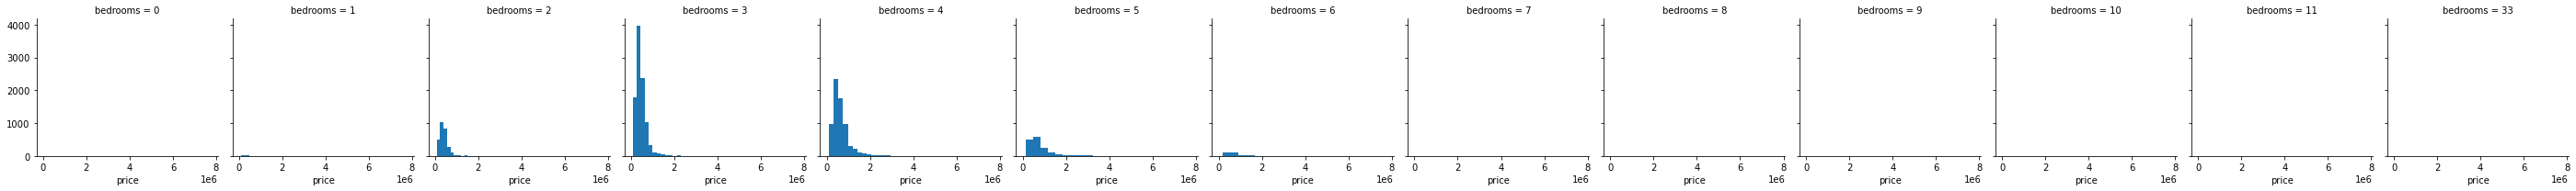

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(df,col='bedrooms')
g.map(plt.hist,'price',bins=20)

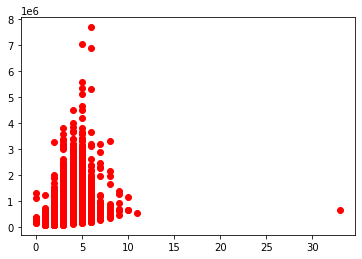

In [4]:
plt.plot(df.bedrooms,df.price,'ro')
plt.show()

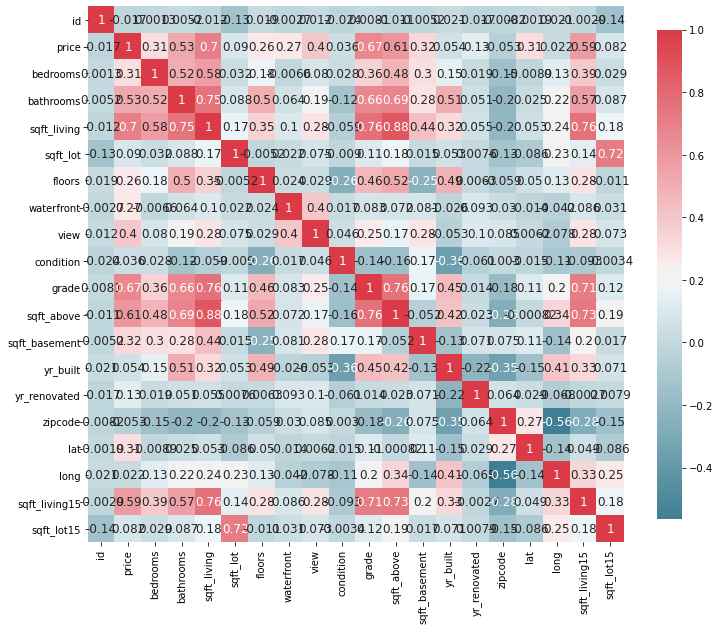

In [5]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = {'fontsize' : 12}

        )
plot_correlation_map( df )

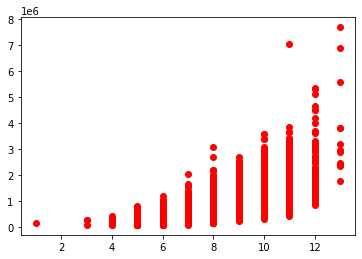

In [6]:
plt.plot(df.grade,df.price,'ro')
plt.show()

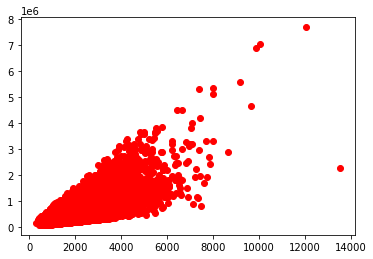

In [7]:
plt.plot(df.sqft_living,df.price,'ro')
plt.show()

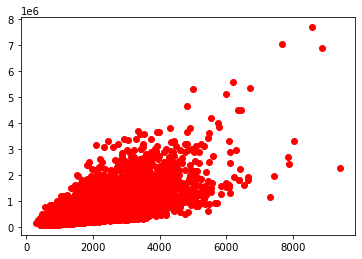

In [8]:
plt.plot(df.sqft_above,df.price,'ro')
plt.show()

In [9]:
# the most important features are bathrooms, sqft_living, grade, sqft_above, sqft_living because they have a useful correlations with price

# linear regression

In [10]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


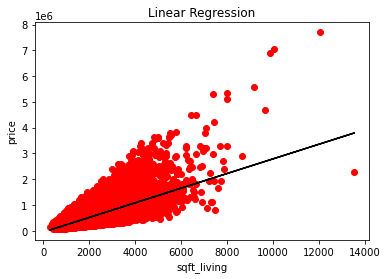

In [11]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [12]:
x=df["grade"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68216329489.98443
R squared 0.45738411228260756


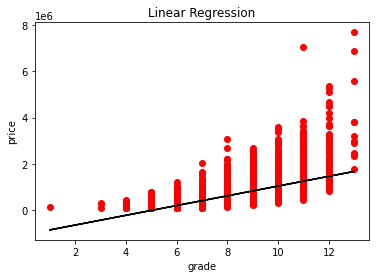

In [13]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(x,model.predict(x),color="k")
plt.show()

# Multi-linear regression

In [14]:
x=df[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living"]] 
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56334848863.44067
R squared 0.5518934505271347


In [15]:
# the MSE in multi_linear regression is less than it in the linear regression but the R squared in multi liear regression is more than it in linear regression

#  Polynomial regression

In [16]:

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  95442692952.9333
R squared:  0.24081635658221567


In [17]:

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[["bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  47548209225.578674
R squared:  0.621785370875199


In [18]:
# as we see teh R squared in the second exemple is so more than the first one ,we just delete the "bedrooms" from the list of "x",so we will try to get the best R squared now with choosing the best features

In [42]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[["floors","view","grade","sqft_above","sqft_basement","yr_built","zipcode","yr_renovated","lat","long","sqft_living15"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  23522168557.804768
R squared:  0.812896670511929


In [43]:
# The last one is the best Polynomial regression with R squared 0.812

In [ ]:
# The  Polynomial regressionthe is the best one if we compare the MSE  and the R squared 